# Plot/map IOP2 WG velocity data for a given time period, make KML

Started 2023/04/23

Basic idea is to load data from all vehicles, then:
1. Plot and save on fixed axes with tight margin and transparent background (for KML file)
2. later add ability to map data


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime
import requests
import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
import functions  # requires functions.py from this directory
import cmocean
import copy

import sys
sys.path.insert(0,'../../Tom_tools/')
import Tom_tools_v1 as tt

import datetime
#import shapely.geometry

In [2]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
#plt.close('all')

%matplotlib inline
%matplotlib widget
# %matplotlib qt5

__figdir__ = '../plots/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.1}
plotfiletype='png'

In [3]:
savefig = True
plt.close('all')

In [4]:
# List of WGs
WG_list = ['WHOI22', 'WHOI32','WHOI43','KELVIN', 'PLANCK','CARSON','WHOI1102','PASCAL']#'WHOI32', 'PLANCK', 'STOKES', 
path='../data/raw/WG_NRT_IOP2/'

In [5]:
# Make a list of the files:
n=0
file_list = []
for WG in WG_list:
    file = path+'adcp_'+WG+'.nc'
    file_list.append(file)

In [6]:
file_list

['../data/raw/WG_NRT_IOP2/adcp_WHOI22.nc',
 '../data/raw/WG_NRT_IOP2/adcp_WHOI32.nc',
 '../data/raw/WG_NRT_IOP2/adcp_WHOI43.nc',
 '../data/raw/WG_NRT_IOP2/adcp_KELVIN.nc',
 '../data/raw/WG_NRT_IOP2/adcp_PLANCK.nc',
 '../data/raw/WG_NRT_IOP2/adcp_CARSON.nc',
 '../data/raw/WG_NRT_IOP2/adcp_WHOI1102.nc',
 '../data/raw/WG_NRT_IOP2/adcp_PASCAL.nc']

In [7]:
# Read in cleaned met files from all WG
n=0
for WG in WG_list:
    file = file_list[n]
    varstr = 'adcp_'+WG
    locals()[varstr]=xr.open_dataset(file,decode_times=True) #Time and z already fixed in WG_realtime_cleanup.ipynb
    n=n+1
    print(file)

../data/raw/WG_NRT_IOP2/adcp_WHOI22.nc
../data/raw/WG_NRT_IOP2/adcp_WHOI32.nc
../data/raw/WG_NRT_IOP2/adcp_WHOI43.nc
../data/raw/WG_NRT_IOP2/adcp_KELVIN.nc
../data/raw/WG_NRT_IOP2/adcp_PLANCK.nc
../data/raw/WG_NRT_IOP2/adcp_CARSON.nc
../data/raw/WG_NRT_IOP2/adcp_WHOI1102.nc
../data/raw/WG_NRT_IOP2/adcp_PASCAL.nc


In [8]:
# Do Sally Ride
SR_adcp_file = '../data/raw/SR_NRT_IOP2/wh300_SR_ADCP_clean.nc'
adcp_SR = xr.open_dataset(SR_adcp_file)
WG_list.append('SR')

In [9]:
%whos

Variable        Type       Data/Info
------------------------------------
SR_adcp_file    str        ../data/raw/SR_NRT_IOP2/wh300_SR_ADCP_clean.nc
WG              str        PASCAL
WG_list         list       n=9
adcp_CARSON     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
adcp_KELVIN     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
adcp_PASCAL     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
adcp_PLANCK     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
adcp_SR         Dataset    <xarray.Dataset>\nDimensi<...>ship_name:     Sally Ride
adcp_WHOI1102   Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
adcp_WHOI22     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
adcp_WHOI32     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
adcp_WHOI43     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
cartopy         module     <module 'cart

In [10]:
tmin = np.datetime64('2023-04-25T21:23:00'); day ='DS0426';#
tmax = np.datetime64('2023-04-26T01:18:00'); #
tmin = np.datetime64('2023-04-26T19:54:00'); day ='DS0426';#
tmax = np.datetime64('2023-04-27T02:05:00'); #
tmin = np.datetime64('2023-04-27T12:08:00'); day ='DS0427';#
tmax = np.datetime64('2023-04-28T02:59:00'); #
tmin = np.datetime64('2023-04-28T19:40:00'); day ='DS0428';#
tmax = np.datetime64('2023-04-29T03:09:00'); #
tmin = np.datetime64('2023-04-29T12:00:00'); day ='now'
tmax = np.datetime64('now')+np.timedelta64(5,'h'); #doing this to make sure all data up to now are included despite time zone differences

#np.datetime64('2023-04-24T23:00:00');#

#tmin = np.datetime64('2023-04-25T06:00:00'); day ='DS0425'
#tmax = np.datetime64('2023-04-25T23:00:00');#np.datetime64('now')+np.timedelta64(5,'h') #doing this to make sure all data up to now are included despite time zone differences

WHOI22<xarray.DataArray 'time' ()>
array('2023-04-30T02:47:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-30T02:47:00
WHOI32<xarray.DataArray 'time' ()>
array('2023-04-30T02:47:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-30T02:47:00
WHOI43<xarray.DataArray 'time' ()>
array('2023-04-30T02:47:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-30T02:47:00
KELVIN<xarray.DataArray 'time' ()>
array('2023-04-30T02:47:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-30T02:47:00
PLANCK<xarray.DataArray 'time' ()>
array('2023-04-30T02:47:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-30T02:47:00
CARSON<xarray.DataArray 'time' ()>
array('2023-04-28T21:02:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-28T21:02:00
Skipping CARSON
WHOI1102<xarray.DataArray 'tim

(34.70413666666603, 35.06632999999938, 36.71822866666667, 36.95285133333332)

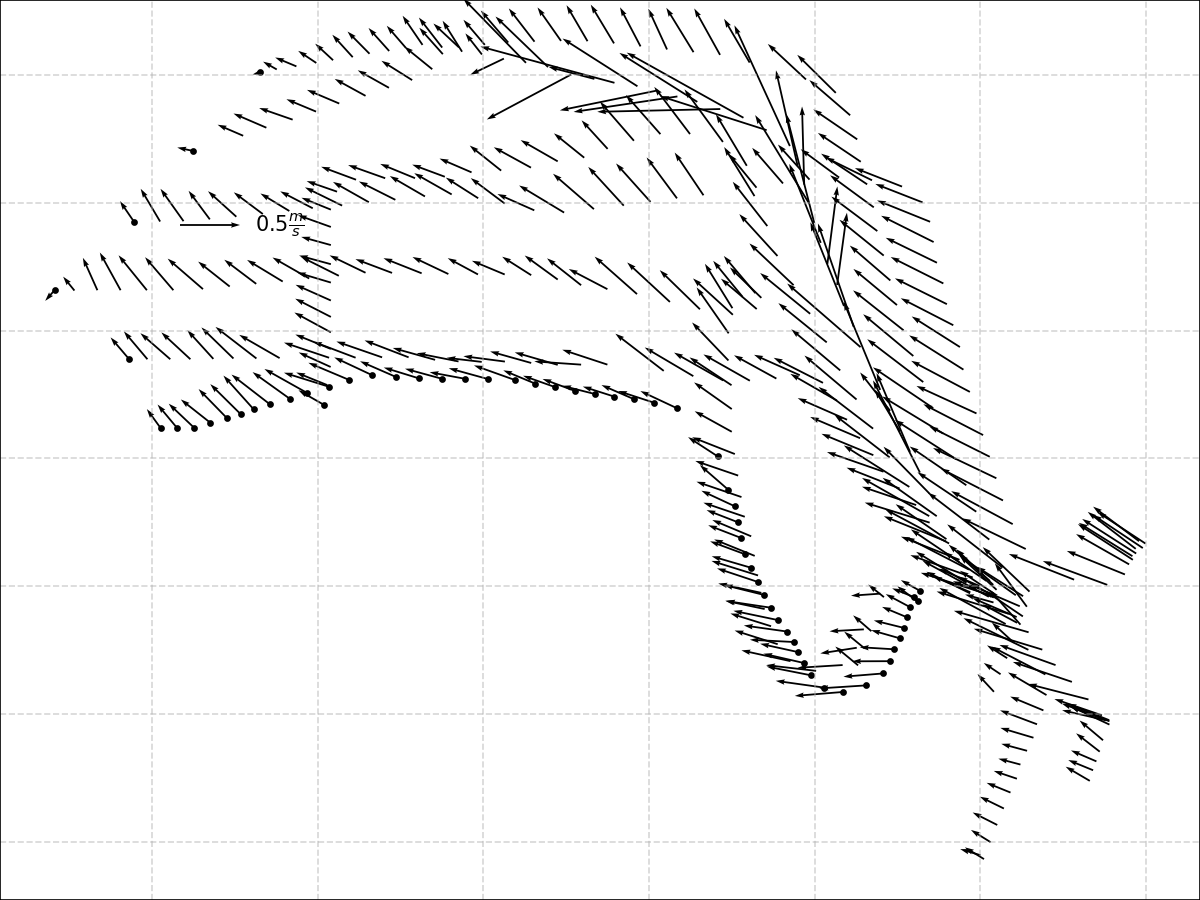

In [11]:

zoom = 5

if zoom == 0: #wide view of S-MODE ops area and San Francisco
    xmin, xmax = (-127,-121)
    ymin, ymax = (35, 39.25)
    zoom_str='_wide'
elif zoom == 1: #centered on S-MODE ops area, but shows San Francisco
    xmin, xmax = (-126.0,-122.0)
    ymin, ymax = (35.5, 39.0)
    zoom_str='_zoom1'
elif zoom == 2: #tight on S-MODE ops area
    xmin, xmax = (-125.5,-123)
    ymin, ymax = (35.5,38.5)
    zoom_str='_zoom2'
elif zoom == 3: #zoom on eastern part of ops area
    xmin, xmax = (-125.25,-123.55)
    ymin, ymax = (36.5, 37.5)
    zoom_str='zoom3'
elif zoom == 4: #not yet determined
    xmin, xmax = (-125.25,-123.75)
    ymin, ymax = (36.25, 37.25)
    zoom_str='_zoom4'
elif zoom == 5:
    xmin, xmax= (-127,-122)
    xmax = -122
    ymin, ymax = (35,39)
    zoom_str='_zoom5'


fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False


skip=1
plotvar = 'uctd_sigma0_Avg'; vmin=24; vmax=25.5
plotvar = 'uctd_temp_Avg'; vmin=10; vmax=12.25
z0=-10
scale = 10
width = 0.0015
# plotvar = 'uctd_cond_Avg'; vmin=None; vmax=None
x = []
y = []
zU = []
zV = []
plt.set_cmap(cmap=plt.get_cmap('turbo'))#viridis

n = 0
for WG in WG_list:
    ds = eval('adcp_'+WG)
    print(WG+str(ds.time[-1]))
    tind = np.flatnonzero(np.logical_and(ds.time>tmin,ds.time<tmax))
    tind=tind[0:-1:skip]
    zind = np.flatnonzero(np.abs(ds.depth-z0)==np.min(np.abs(ds.depth-z0)))
    if WG=='SR':
        zind = np.flatnonzero(np.abs(ds.depth[-1,:].values-10)==np.min(np.abs(ds.depth[-1,:].values-10)))
    if tind.size==0:
        print('Skipping '+WG)
        continue
    else:
        if n == 0:
            Qgeo = ax.quiver(ds.Longitude[tind].values,ds.Latitude[tind].values,np.squeeze(ds.current_east[tind, zind].values),np.squeeze(ds.current_north[tind, zind].values),scale=scale,width=width,transform=ccrs.PlateCarree())
            ax.scatter(ds.Longitude[tind].values,ds.Latitude[tind].values,s=5,color='k',transform=ccrs.PlateCarree())
            qk = ax.quiverkey(Qgeo, 0.2, 0.75, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E', coordinates='figure')
            width = Qgeo.width
            headwidth = Qgeo.headwidth
            headlength = Qgeo.headlength
            headaxislength = Qgeo.headaxislength
        else:
            try:
                Q = ax.quiver(ds.Longitude[tind].values,ds.Latitude[tind].values,np.squeeze(ds.current_east[tind, zind].values),np.squeeze(ds.current_north[tind, zind].values),scale=scale,transform=ccrs.PlateCarree(), width = width, headlength = headlength, headwidth = headwidth, headaxislength = headaxislength)
                ax.scatter(ds.Longitude[tind[-1]].values,ds.Latitude[tind[-1]].values,s=5,color='k',transform=ccrs.PlateCarree())
            except:
                continue
        n = n+1 #increment counter

    ax.text(ds.Longitude[tind[-1]].values,ds.Latitude[tind[-1]].values,WG)

    for i in ds.Longitude[tind].values.tolist(): x.append(i)
    for i in ds.Latitude[tind].values.tolist(): y.append(i)
    for i in np.squeeze((ds.current_east[tind, zind].values).tolist()): zU.append(i)
    for i in np.squeeze((ds.current_north[tind, zind].values).tolist()): zV.append(i)



plt.gca().set_position([0, 0, 1, 1])
plt.axis('tight')

In [12]:
#ax.margins(0)
if savefig:
    plt.savefig(__figdir__+'vel_quiver.' + plotfiletype, transparent=True)#,**savefig_args)

In [13]:
l,r,b,t = ax.get_extent(crs=ccrs.PlateCarree())
print('    '+ str(np.round(l,3))+','+str(np.round(b,3)))
print('    '+ str(np.round(r,3))+','+str(np.round(b,3)))
print('    '+ str(np.round(r,3))+','+str(np.round(t,3)))
print('    '+ str(np.round(l,3))+','+str(np.round(t,3)))

    -125.296,36.718
    -124.934,36.718
    -124.934,36.953
    -125.296,36.953


In [14]:
dx = 0.005
dy = 0.005
xg = np.arange(np.nanmin(x),np.nanmax(x),dx)
yg = np.arange(np.nanmin(y),np.nanmax(y),dy)

In [15]:
ind = np.flatnonzero(np.isnan(zU)==0)
zU2 = [zU[ii] for ii in ind]
zV2 = [zV[ii] for ii in ind]
x2 = [x[ii] for ii in ind]
y2 = [y[ii] for ii in ind]

ind = np.flatnonzero(np.isnan(x2)==0)
zU2 = [zU2[ii] for ii in ind]
zV2 = [zV2[ii] for ii in ind]
x2 = [x2[ii] for ii in ind]
y2 = [y2[ii] for ii in ind]


In [16]:
corr = 0.05
zUg, eUg = tt.objmap(x2, y2, zU2, xg, yg, lcorr=corr, tcorr=corr, err = 0.1, orientation=0)
zVg, eVg = tt.objmap(x2, y2, zV2, xg, yg, lcorr=corr, tcorr=corr, err = 0.1, orientation=0)
ind = np.nonzero(eUg>0.05)
zUg[ind]=np.nan
ind = np.nonzero(eVg>0.05)
zVg[ind]=np.nan

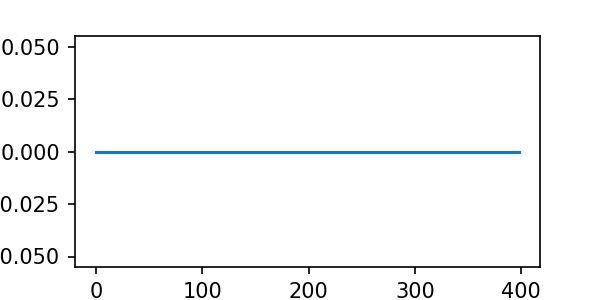

In [17]:
plt.figure(figsize=(4,2))
plt.plot(np.isnan(x2))

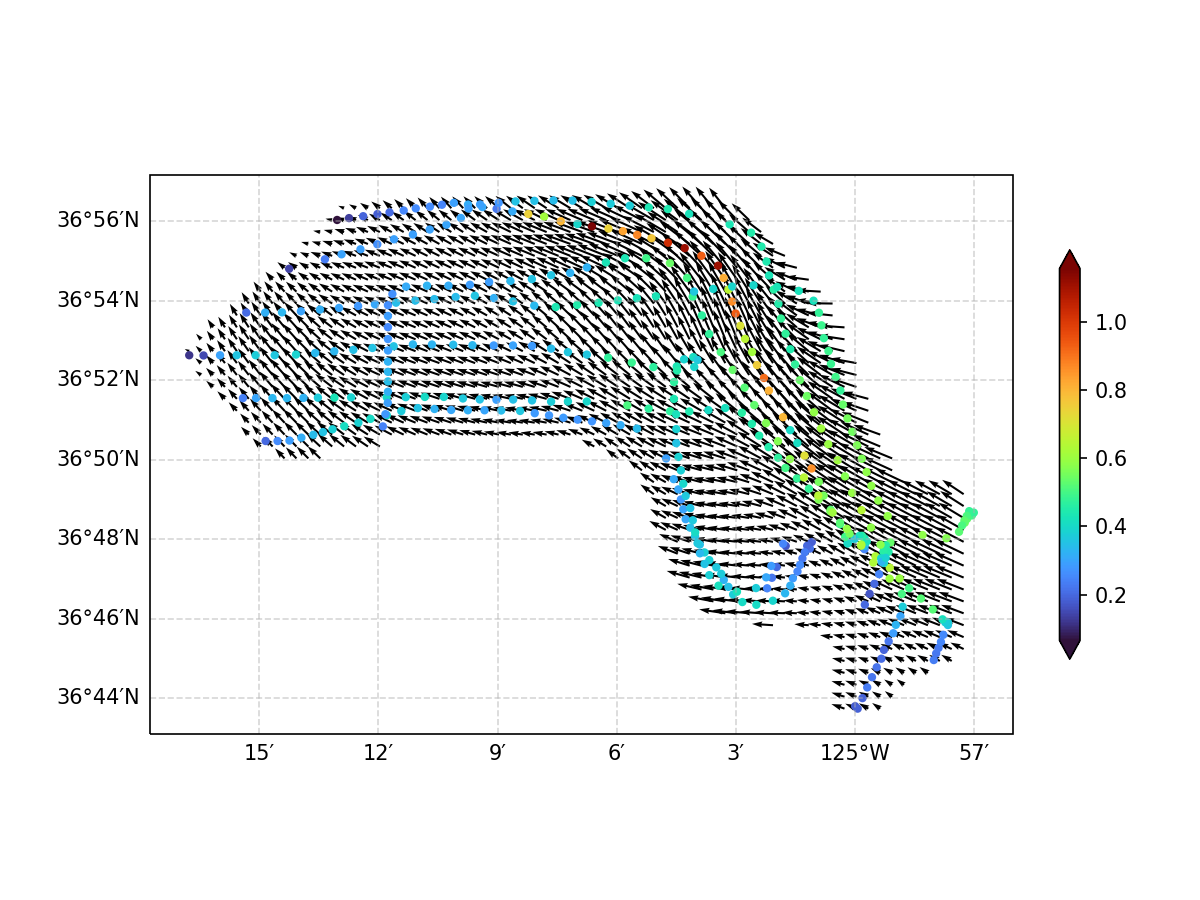

In [18]:
vmin=0; vmax=0.6
foo1= [i**2 for i in zU]
foo2= [i**2 for i in zV]
foo3=[np.sqrt(foo1[i]+foo2[i]) for i in range(0,len(foo2))]
plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
#ax.set_extent(extent, crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
plt.quiver(xg,yg,zUg,zVg,scale=15,transform=ccrs.PlateCarree())
cs = plt.scatter(x,y,s=None,c=foo3,marker='.',transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022,extend='both')

In [19]:
#ax.margins(0)
if savefig:
    plt.savefig(__figdir__+'vel_map_quiver_'+day+'.' + plotfiletype, transparent=True)#,**savefig_args)

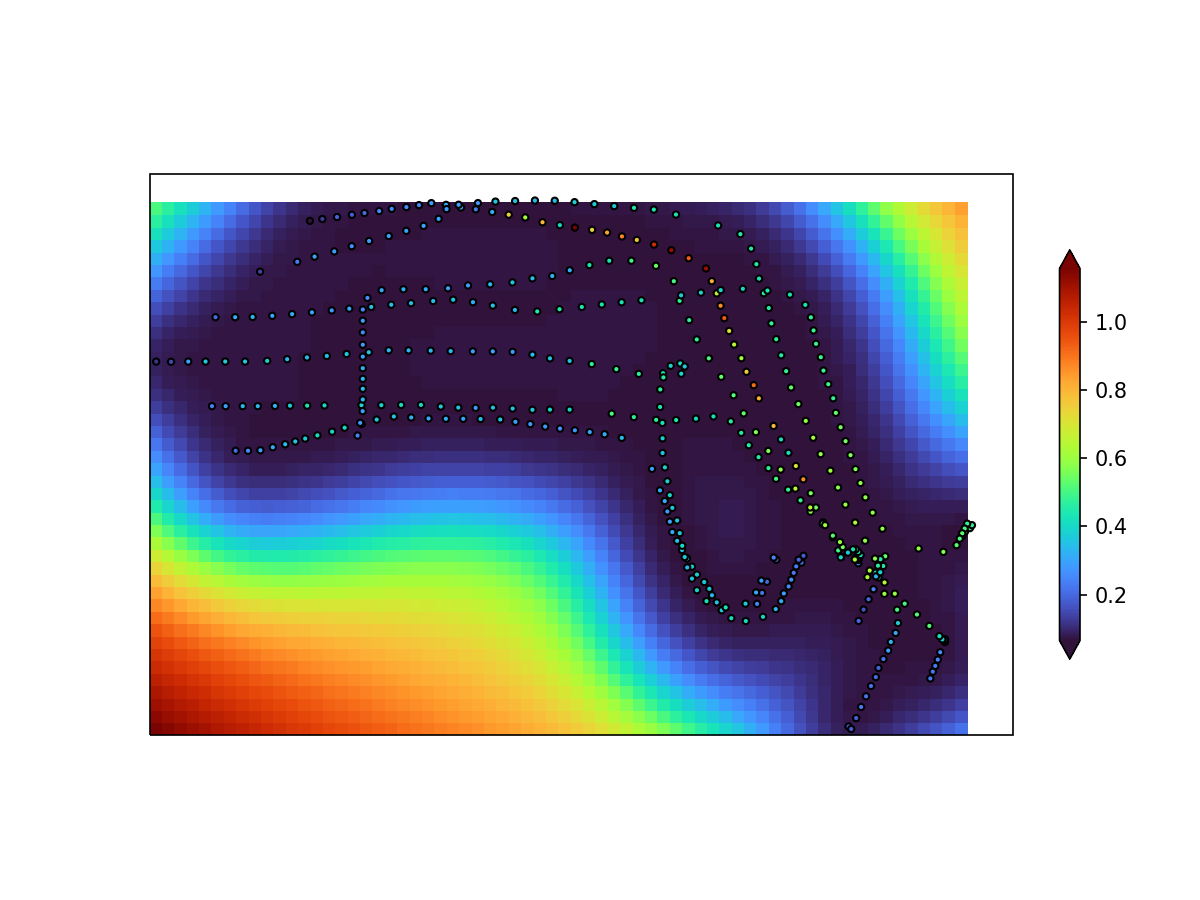

In [20]:
vmin=0; vmax=0.6
ind = np.nonzero(eUg>0.05)
zUg[ind]=np.nan
ind = np.nonzero(eVg>0.05)
zVg[ind]=np.nan
plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
plt.pcolor(xg,yg,eUg+eVg,transform=ccrs.PlateCarree())
cs = plt.scatter(x,y,s=None,c=foo3,marker='.',edgecolor='k',transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022,extend='both')

In [21]:
# plt.close('all')

In [22]:
# Add a 10 km scale bar
m_per_deg_lat=gsw.geostrophy.distance((125,125), (36.5,37.5))
m_per_deg_lon=gsw.geostrophy.distance((125,126), (37,37))
dxm = dx*m_per_deg_lon[0]
dym = dy*m_per_deg_lat[0]

In [23]:
f = gsw.geostrophy.f(37)
inertial_period = 2*np.pi/f/3600
print('Inertial period is '+ f'{inertial_period:.1f}' + ' hours')

Inertial period is 19.9 hours


In [24]:
np.shape(zUg)
np.shape(xg)

(66,)

In [25]:
ux=np.gradient(zUg,dxm,axis=1)
vx=np.gradient(zVg,dxm,axis=1)
uy=np.gradient(zUg,dym,axis=0)
vy=np.gradient(zUg,dym,axis=0)

In [26]:
zeta=(vx-uy)/f
div=(ux+vy)/f

(34.71809999999941, 35.06645499999938, 36.726393333333334, 36.952976333333325)

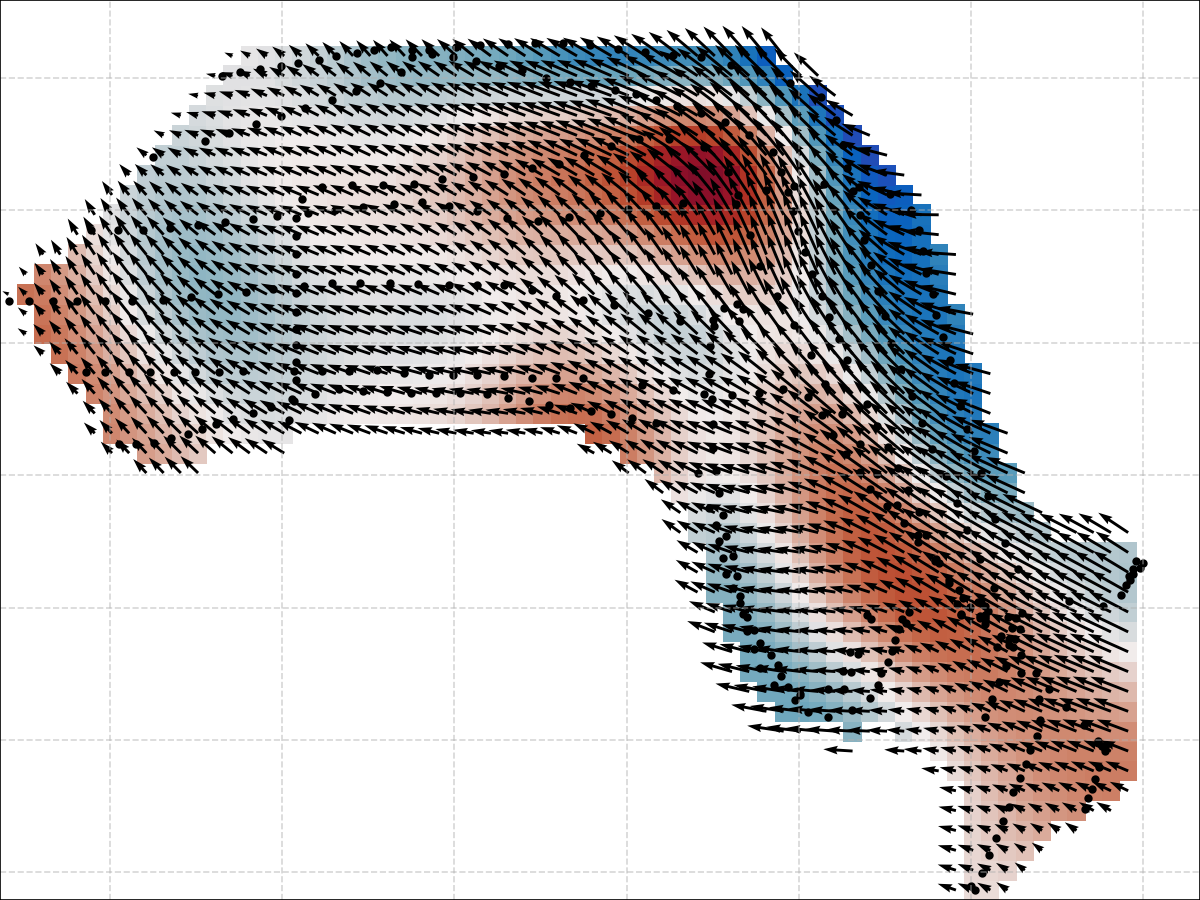

In [27]:
vmin=-3; vmax=3
ind = np.nonzero(eUg>0.1)
eUg[ind]=np.nan
ind = np.nonzero(eVg>0.1)
eVg[ind]=np.nan
plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
cmap = plt.get_cmap('seismic')# cmocean.cm.balance
plt.set_cmap(cmap=cmap)#plt.get_cmap('seismic')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cs = plt.pcolor(xg,yg,zeta,vmin = vmin, vmax = vmax, cmap= 'cmo.balance', transform=ccrs.PlateCarree())
plt.title('Vorticity')
plt.quiver(xg,yg,zUg,zVg,scale=15,transform=ccrs.PlateCarree())
plt.scatter(x,y,s=None,c='k',marker='.',edgecolor='k',color=None,transform=ccrs.PlateCarree())
#cs = plt.scatter(x,y,s=None,c=foo3,marker='.',edgecolor='k',transform=ccrs.PlateCarree())
#cb = plt.colorbar(cs,label='$\zeta/f$',fraction = 0.022,extend='both')
plt.gca().set_position([0, 0, 1, 1])
plt.axis('tight')

In [28]:
ax.margins(0)
if savefig:
    plt.savefig(__figdir__+'zeta_map_quiver_'+day+'.' + plotfiletype, transparent=True)#,**savefig_args)

In [29]:
l,r,b,t = ax.get_extent(crs=ccrs.PlateCarree())
print('    '+ str(np.round(l,3))+','+str(np.round(b,3)))
print('    '+ str(np.round(r,3))+','+str(np.round(b,3)))
print('    '+ str(np.round(r,3))+','+str(np.round(t,3)))
print('    '+ str(np.round(l,3))+','+str(np.round(t,3)))

    -125.282,36.726
    -124.934,36.726
    -124.934,36.953
    -125.282,36.953


(34.71809999999941, 35.06645499999938, 36.726393333333334, 36.952976333333325)

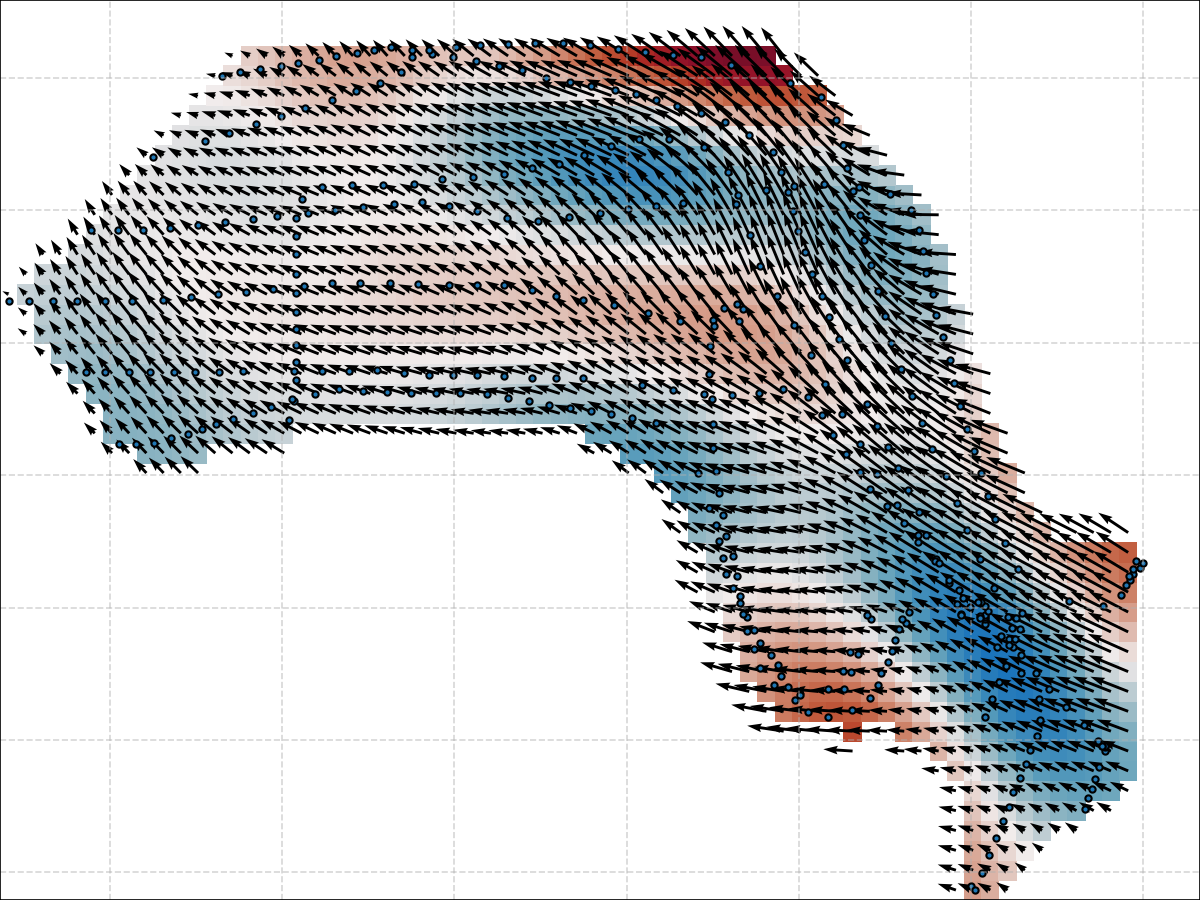

In [30]:
vmin=-3; vmax=3
ind = np.nonzero(eUg>0.1)
eUg[ind]=np.nan
ind = np.nonzero(eVg>0.1)
eVg[ind]=np.nan
plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#cmap = plt.get_cmap('seismic')# cmocean.cm.balance
#plt.set_cmap(cmap=cmap)#plt.get_cmap('seismic')
#plt.set_cmap(cmap=plt.get_cmap('cmo.balance'))
cmap = copy.copy(matplotlib.colormaps.get_cmap("cmo.balance"))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
cs = plt.pcolor(xg,yg,div,vmin = vmin, vmax = vmax, cmap= 'cmo.balance', transform=ccrs.PlateCarree())
plt.title('Divergence')
plt.quiver(xg,yg,zUg,zVg,scale=15,transform=ccrs.PlateCarree())
plt.scatter(x,y,s=None,c=None,marker='.',edgecolor='k',color=None,transform=ccrs.PlateCarree())
#cs = plt.scatter(x,y,s=None,c=foo3,marker='.',edgecolor='k',
#cb = plt.colorbar(cs,fraction = 0.022,extend='both')
plt.gca().set_position([0, 0, 1, 1])
plt.axis('tight')

In [31]:
ax.margins(0)
if savefig:
    plt.savefig(__figdir__+'div_map_quiver_'+day+'.' + plotfiletype, transparent=True)#,**savefig_args)

In [32]:
ax.get_extent(crs=ccrs.PlateCarree())

(-125.28189999999995, -124.933545, 36.726393333333334, 36.952976333333325)